In [9]:
import numpy as np
import matplotlib.pyplot as plt
import chainer.optimizers as Opt
import chainer.functions as F
import chainer.links as L
import chainer.datasets as ds
import chainer.dataset.convert as con
from chainer import Variable,Chain,config,cuda

import princess as ohm

In [4]:
train,test=ds.get_cifar10(ndim=3)
xtrain,ttrain=con.concat_examples(train)
xtest,ttest = con.concat_examples(test)

In [5]:
Dtrain,ch,Ny,Nx=xtrain.shape
print(Dtrain,ch,Ny,Nx)

50000 3 32 32


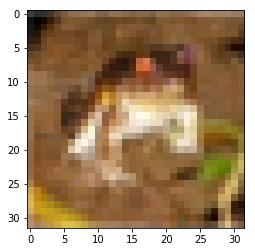

In [5]:
plt.imshow(xtrain[0,:,:,:].transpose(1,2,0))
plt.show()

In [6]:
C=ttrain.max()+1
H1=10
layers={}
layers["conv1"]=L.Convolution2D(ch,H1,ksize=3,stride=1,pad=1)
layers["l1"]=L.Linear(None,C)
NN=Chain(**layers)

In [7]:
def model(x):
    h=NN.conv1(x)
    h=F.relu(h)
    h=NN.bnorm1(h)
    h=F.max_pooling_2d(h,ksize=3,stride=2,pad=1)
    h=NN.l1(h)
    return h

In [8]:
gpu_device=0
cuda.get_device(gpu_device).use()
NN.to_gpu(gpu_device)
optNN=Opt.MomentumSGD()
optNN.setup(NN)
train_loss=[]
train_acc=[]
test_loss=[]
test_acc=[]
data=cuda.to_gpu([xtrain,xtest,ttrain,ttest],gpu_device)
result=[train_loss,test_loss,train_acc,test_acc]
ohm.learning_classification(model,optNN,data,result,100)


RuntimeError: CUDA environment is not correctly set up
(see https://github.com/chainer/chainer#installation).CuPy is not correctly installed.

If you are using wheel distribution (cupy-cudaXX), make sure that the version of CuPy you installed matches with the version of CUDA on your host.
Also, confirm that only one CuPy package is installed:
  $ pip freeze

If you are building CuPy from source, please check your environment, uninstall CuPy and reinstall it with:
  $ pip install cupy --no-cache-dir -vvvv

Check the Installation Guide for details:
  https://docs-cupy.chainer.org/en/latest/install.html

original error: libcuda.so.1: cannot open shared object file: No such file or directory

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import chainer.optimizers as Opt
import chainer.functions as F
import chainer.links as L
import chainer.datasets as ds
import chainer.dataset.convert as con
from chainer import Variable,Chain,config,cuda

import princess as ohm
from chainer.iterators import SerialIterator as siter

In [ ]:
train_loss=[]
train_acc=[]
test_loss=[]
test_acc=[]
result=[train_loss,test_loss,train_acc,test_acc]


In [ ]:
batch_size=5000
train_iter=siter(train,batch_size)

In [ ]:
nepoch = 20
while train_iter.epoch < nepoch:
    batch = train_iter.next()
    xtrain,ttrain = con.concat_examples(batch)
    data=cuda.to_gpu([xtrain,xtest,ttrain,ttest])
    ohm.learning_classification(model,optNN,data,result,1)

In [ ]:
ohm.plot_result2(result[0],result[1],"loss function","step","loss function",0.0,4.0)
ohm.plot_result2(result[2],result[3],"accuracy","step","accuracy",0.0,4.0)

In [ ]:
C = ttrain.max()+1
H1=32
layers={}
layers["cnn1"]=ohm.CNN(ch,H1)
layers["cnn2"]=ohm.CNN(H1,H1)
layers["cnn3"]=ohm.CNN(H1,C)
layers["l1"]=L.Linear(None,H2)
layers["l2"]=L.Linear(H2,C)
layers["bnorm1"]=L.BatchNormalization(H2)
NN=Chain(**layers)


In [ ]:
def model(x,ratio=0.1):
    h=NN.cnn1(x)
    h=NN.cnn2(h)
    h=NN.cnn3(h)
    h=NN.l1(h)
    h=F.relu(h)
    h=NN.bnorm1(h)
    #h=F.dropout(h,ratio)
    #y=NN.l2(h)
    y=F.mean(h,axis=(2,3))
    return y

In [ ]:
from chainer import optimizer_hooks as oph
OptNN.add_hook(oph.WeightDecay(rate=0.0005))

In [10]:
from chainer import optimizer_hooks as oph
OptNN.add_hook(oph.Lasso(rate=0.0005))

NameError: name 'OptNN' is not defined

In [11]:
batch_size=5000
train_iter=siter(train,batch_size)
nepoch = 20
while train_iter.epoch < nepoch:
    batch = train_iter.next()
    batch=ds.TransformDataset(batch,ohm.flip_labeled)
    batch=ds.TransformDataset(batch,ohm.shift_labeled)
    xtrain,ttrain = con.concat_examples(batch)
    data=cuda.to_gpu([xtrain,xtest,ttrain,ttest])
    ohm.learning_classification(model,optNN,data,result,1)

NameError: name 'siter' is not defined

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import chainer.optimizers as Opt
import chainer.functions as F
import chainer.links as L
import chainer.datasets as ds
import chainer.dataset.convert as con
from chainer import Variable,Chain,config,cuda

import princess as ohm
from chainer.iterators import SerialIterator as siter
from IPython import display

In [ ]:
train,test=ds.get_cifar10(ndim=3)
xtrain,ttrain=con.concat_examples(train)
xtest,ttest = con.concat_examples(test)
Dtrain,ch,Ny,Nx=xtrain.shape
C = ttrain.max()+1
H1=32
H2=16
layers={}
layers["cnn1"]=ohm.CNN(ch,H1)
layers["cnn2"]=ohm.CNN(H1,H1)
layers["cnn3"]=ohm.CNN(H1,C)
layers["l1"]=L.Linear(None,H2)
layers["l2"]=L.Linear(H2,C)
layers["bnorm1"]=L.BatchNormalization(H2)
NN=Chain(**layers)

def model(x):
    h=NN.cnn1(x)
    h=NN.cnn2(h)
    h=NN.cnn3(h)
    h=NN.l1(h)
    h=F.relu(h)
    h=NN.bnorm1(h)
    h=F.dropout(h,ratio=0.0005)
    #y=NN.l2(h)
    y=F.mean(h,axis=(2,3))
    return y

train_loss=[]
train_acc=[]
test_loss=[]
test_acc=[]
result=[train_loss,test_loss,train_acc,test_acc]

gpu_device=0
#cuda.get_device(gpu_device).use()
#NN.to_gpu(gpu_device)
OptNN=Opt.MomentumSGD()
OptNN.setup(NN)

from chainer import optimizer_hooks as oph
OptNN.add_hook(oph.WeightDecay(rate=0.0005))

from chainer import optimizer_hooks as oph
OptNN.add_hook(oph.Lasso(rate=0.0005))

batch_size=1000
train_iter=siter(train,batch_size)
nepoch = 50
while train_iter.epoch < nepoch:
    batch = train_iter.next()
    batch=ds.TransformDataset(batch,ohm.flip_labeled)
    batch=ds.TransformDataset(batch,ohm.shift_labeled)
    xtrain,ttrain = con.concat_examples(batch)
    #data=cuda.to_gpu([xtrain,xtest,ttrain,ttest])
    data=[xtrain,xtest,ttrain,ttest]
    ohm.learning_classification(model,OptNN,data,result,1)
    if train_iter.is_new_epoch==1:
        display.clear_output(wait=True)
        print('epoch:',train_iter.epoch)
        ohm.plot_result2(result[0],result[1],'loss function','step','loss function',0.0,4.0)
        ohm.plot_result2(result[2],result[3],'accuracy', 'step','accuracy') 

In [6]:
x =np.random.rand(2*ch*Ny*Nx).reshape(2,ch,Ny,Nx).astype(np.float32)
h=ohm.check_network(x,L.Convolution2D(ch,10,ksize=3,stride=1,pad=1))

input: (2, 3, 32, 32)
output: (2, 10, 32, 32)
